In [22]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1. Creating the merged dataset(Household power consumption + Weather data)

In [23]:
# Loading the power consumption data
power_df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                       parse_dates={'datetime': ['Date', 'Time']},
                       infer_datetime_format=True,
                       na_values='?',
                       low_memory=False)

# Converting 'datetime' to datetime object and set as index
power_df['datetime'] = pd.to_datetime(power_df['datetime'], format='%d/%m/%Y %H:%M:%S')
power_df.set_index('datetime', inplace=True)

# Localizing the power data index to UTC to match weather data
power_df.index = power_df.index.tz_localize('UTC')


# Converting relevant columns to numeric
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
        'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
power_df[cols] = power_df[cols].apply(pd.to_numeric, errors='coerce')

# Resampling to hourly data
power_hourly = power_df.resample('H').mean()

# Loading the weather data
weather_df = pd.read_csv('/content/weatherHistory.csv')

# Converting 'Formatted Date' to datetime and set as index
weather_df['Formatted Date'] = pd.to_datetime(weather_df['Formatted Date'], utc=True)
weather_df.set_index('Formatted Date', inplace=True)

# Resampling to hourly data
weather_hourly = weather_df.select_dtypes(include=np.number).resample('H').mean()

# Merging the datasets on datetime
merged_df = pd.merge(power_hourly, weather_hourly, left_index=True, right_index=True, how='inner')

# Dropping the rows with missing values
merged_df.dropna(inplace=True)

# Displaying the first few rows of the merged dataset
merged_df.head()

<ipython-input-23-78df94c26ec1>:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  power_df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
<ipython-input-23-78df94c26ec1>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  power_df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
<ipython-input-23-78df94c26ec1>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  power_df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
<ipython-input-23-78df94c26ec1>:22: FutureWarning: 'H' is depre

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
2006-12-16 17:00:00+00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,-1.161111,-4.022222,1.00,7.8246,209.0,0.3220,0.0,1029.92
2006-12-16 18:00:00+00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,-1.061111,-4.455556,1.00,9.6278,199.0,0.3059,0.0,1030.06
2006-12-16 19:00:00+00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,-1.161111,-1.161111,1.00,3.1395,208.0,0.3220,0.0,1030.11
2006-12-16 20:00:00+00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,-1.111111,-1.111111,0.96,3.0268,218.0,0.3220,0.0,1029.82
2006-12-16 21:00:00+00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,-1.161111,-1.161111,0.97,2.7853,189.0,0.1610,0.0,1029.65


## 2. Visualizing the dataset

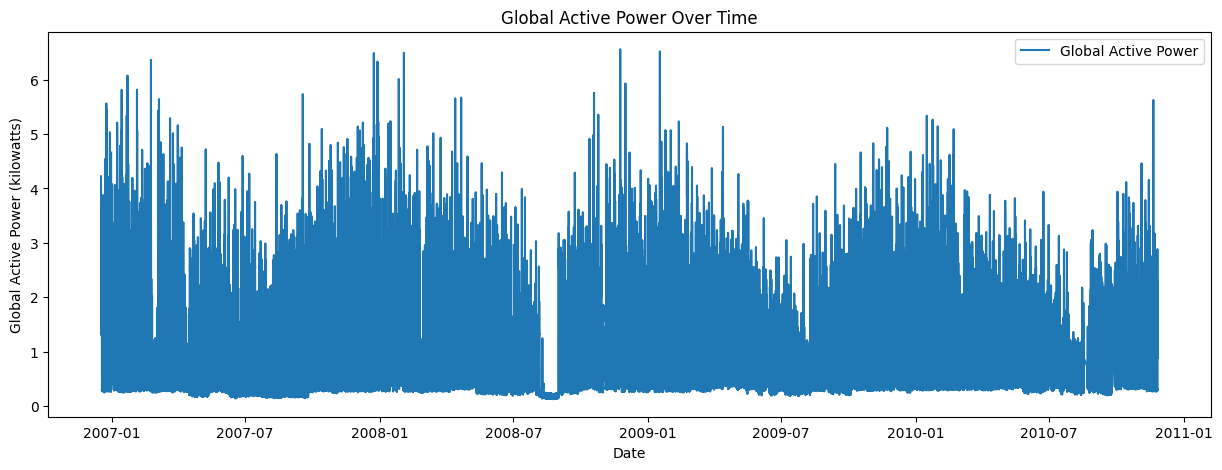

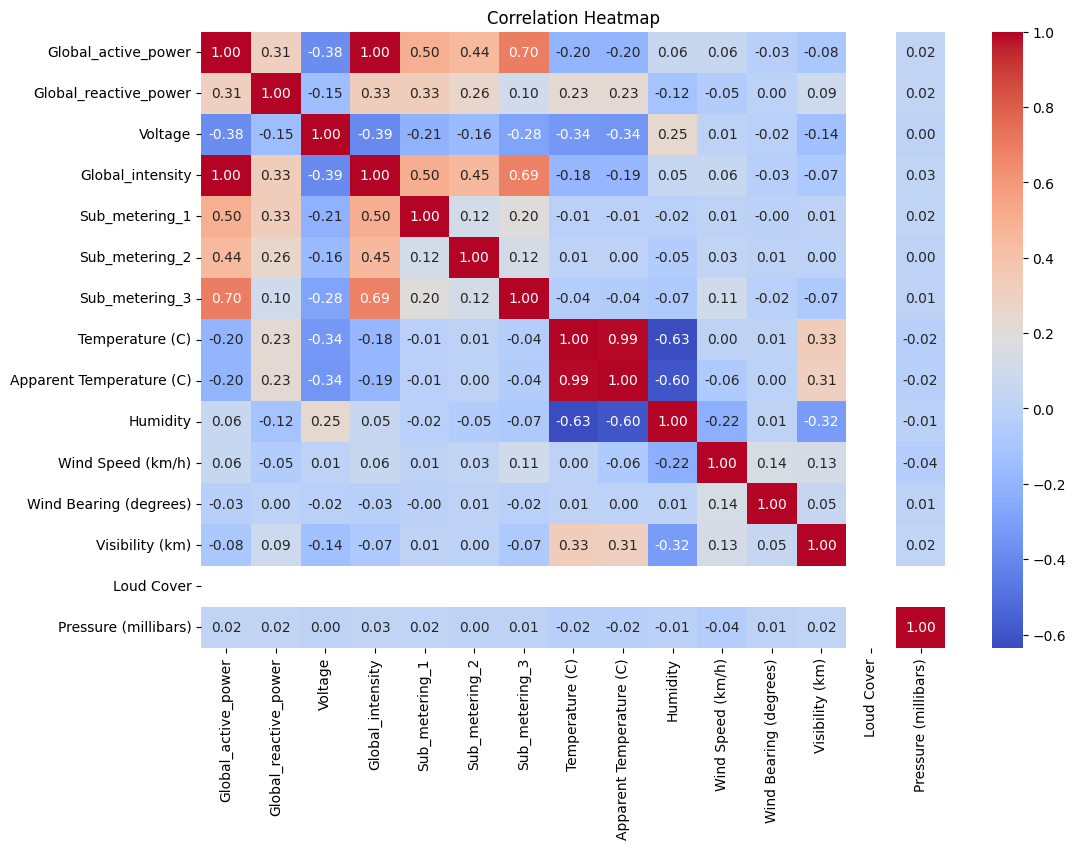

In [24]:
# Plotting power consumption over time

plt.figure(figsize=(15, 5))
plt.plot(merged_df.index, merged_df['Global_active_power'], label='Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Global Active Power Over Time')
plt.legend()
plt.show()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 3. ARIMA Model

In [25]:
#Importing the libraries required for the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math

# Using only the 'Global_active_power' column
power_series = merged_df['Global_active_power']

# Splitting the data into train and test sets
train_size = int(len(power_series) * 0.8)
train, test = power_series[0:train_size], power_series[train_size:]

# Fitting the ARIMA model
model_arima = ARIMA(train, order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecasting with the help of ARIMA model
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Evaluating the ARIMA model
rmse_arima = math.sqrt(mean_squared_error(test, forecast_arima))
print(f'ARIMA RMSE: {rmse_arima:.3f}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA RMSE: 0.800


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## 4. Prophet Model

In [26]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import math

#Preparing the dataset for the prophet model
prophet_df = merged_df.reset_index()[['index', 'Global_active_power']].rename(columns={'index': 'ds', 'Global_active_power': 'y'})
prophet_df['ds'] = prophet_df['ds'].dt.tz_convert(None)
prophet_df['temp'] = merged_df['Temperature (C)'].values
prophet_df['humidity'] = merged_df['Humidity'].values
prophet_df['wind_speed'] = merged_df['Wind Speed (km/h)'].values

# Splitting the dataset into train and test sets
prophet_train = prophet_df.iloc[0:train_size]
prophet_test = prophet_df.iloc[train_size:]

# Initializing Prophet model
model_prophet = Prophet()
model_prophet.add_regressor('temp')
model_prophet.add_regressor('humidity')
model_prophet.add_regressor('wind_speed')

# Fitting the Prophet model
model_prophet.fit(prophet_train)

# Creating the future dataframe for prediction
future = prophet_test[['ds', 'temp', 'humidity', 'wind_speed']]

# Forecasting using the Prophet model
forecast_prophet = model_prophet.predict(future)

# Evaluating the Prophet model
rmse_prophet = math.sqrt(mean_squared_error(prophet_test['y'], forecast_prophet['yhat']))
print(f'Prophet RMSE: {rmse_prophet:.3f}')

DEBUG:cmdstanpy:input tempfile: /tmp/tmpabigvdqs/n86a9gfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpabigvdqs/p0nrory6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93072', 'data', 'file=/tmp/tmpabigvdqs/n86a9gfr.json', 'init=/tmp/tmpabigvdqs/p0nrory6.json', 'output', 'file=/tmp/tmpabigvdqs/prophet_modela0ytv9w_/prophet_model-20250530212143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 0.637


## 5. Model Forecast Comparison

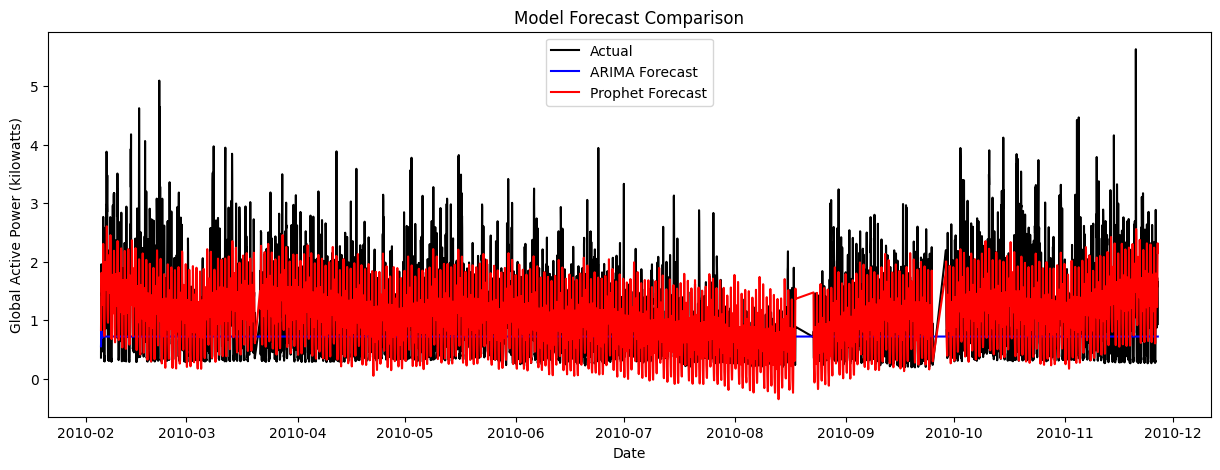

In [27]:
# Plot actual vs predicted for each model
plt.figure(figsize=(15, 5))
plt.plot(test.index, test, label='Actual', color='black')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast', color='blue')
plt.plot(test.index, forecast_prophet['yhat'].values, label='Prophet Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Model Forecast Comparison')
plt.legend()
plt.show()